
[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Dewmi Silva\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
config.json not found in HuggingFace Hub.
Fetching 11 files: 100%|██████████| 11/11 [00:00<00:00, 10979.85it/s]


1/1 [==============================] - 37s 37s/step


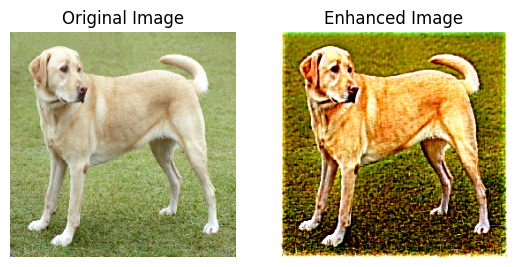

In [1]:
! pip install keras
! pip install huggingface_hub

import numpy as np
from huggingface_hub import from_pretrained_keras
import keras
from PIL import Image
import matplotlib.pyplot as plt

model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

def enhance_low_light_image(input_image_path):
    # Open and preprocess the input image
    low_light_img = Image.open(input_image_path).convert('RGB')
    low_light_img = low_light_img.resize((256, 256), Image.NEAREST)
    image = keras.preprocessing.image.img_to_array(low_light_img)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

    # Enhance the low light image using the model
    output = model.predict(image)

    # Post-process the output image
    output_image = output[0] * 255.0
    output_image = output_image.clip(0, 255)
    output_image = output_image.reshape((np.shape(output_image)[0], np.shape(output_image)[1], 3))
    output_image = np.uint8(output_image)

    # Display the original and enhanced images
    fig, axs = plt.subplots(1, 2)
    
    # Original Image
    axs[0].imshow(low_light_img)
    axs[0].set_title("Original Image")
    axs[0].axis('off')
    
    # Enhanced Image
    axs[1].imshow(output_image)
    axs[1].set_title("Enhanced Image")
    axs[1].axis('off')
    
    plt.show()

# Example usage
input_image_path = 'C:/Users/Dewmi Silva/Downloads/YellowLabradorLooking_new.jpg'
enhance_low_light_image(input_image_path)
